In [4]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fsolve

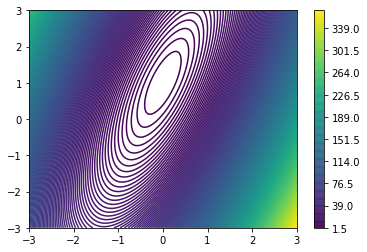

In [9]:
#Anonymous function (Lambda function)
model = lambda p: 4 + 12*p[0] - 8*p[1] + 18*p[0]**2 - 12*p[0]*p[1] + 4*p[1]**2

x = np.linspace(-3,3,500)
y = np.linspace(-3,3,500)
X,Y = np.meshgrid(x,y)

Z = model([X,Y])

plt.contour(X,Y,Z,250)
plt.colorbar()

In [11]:
#minimize for p with no constraint on delta
res = minimize(model,np.array([0,0]))
print(res.x)

[5.60798885e-09 1.00000001e+00]


In [12]:
p_list = []
radius = 0
while radius <= 2:
    cons = ({'type':'ineq','fun': lambda p: radius - np.sqrt(p[0]**2 + p[1]**2)})
    res = minimize(model,np.array([0,0]), constraints = (cons))
    p_list.append(res.x)
    radius += 0.01
p_list = np.array(p_list)

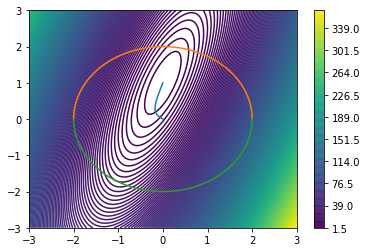

In [16]:
plt.contour(X,Y,Z,250)
plt.colorbar()
plt.plot(p_list[:,0],p_list[:,1])

xx = np.linspace(-2,2,500)
plt.plot(xx,np.sqrt(4 - xx**2))
plt.plot(xx,-np.sqrt(4 - xx**2))